<a href="https://colab.research.google.com/github/DOCAUE/tech_challenge_04/blob/main/TECH_CHALLENGE_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importação das Bibliotecas**

In [ ]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignorar avisos que podem aparecer durante a execução (apenas para limpeza visual)
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas para visualização
plt.style.use('ggplot')  # estilo dos gráficos
sns.set_palette("husl")  # cores dos gráficos

# Configurações graficos
pd.set_option('display.max_columns', None)  # mostra todas as colunas
pd.set_option('display.max_rows', 100)     # mostra até 100 linhas

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

**2. Carregamento e Exploração Inicial dos Dados**

In [ ]:
# Carregamento dos dados
df = pd.read_csv('Obesity.csv')

print("=== INFORMAÇÕES BÁSICAS DO DATASET ===")
print(f"Shape do dataset: {df.shape}")
print(f"\nTipos de dados:")
print(df.dtypes)

print(f"\nPrimeiras 5 linhas:")
df.head()



=== INFORMAÇÕES BÁSICAS DO DATASET ===
Shape do dataset: (2111, 17)

Tipos de dados:
Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

Primeiras 5 linhas:


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Converte para int e float
df['Age'] = df['Age'].astype(int)
df['Height'] = df['Height'].round(2)
df['Weight'] = df['Weight'].astype(int)



In [ ]:
print("=== INFORMAÇÕES BÁSICAS DO DATASET ===")
print(f"Shape do dataset: {df.shape}")
print(f"\nTipos de dados:")
print(df.dtypes)

=== INFORMAÇÕES BÁSICAS DO DATASET ===
Shape do dataset: (2111, 17)

Tipos de dados:
Gender             object
Age                 int64
Height            float64
Weight              int64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object


In [ ]:
df.tail()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
2106,Female,20,1.71,131,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.75,133,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.75,133,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23,1.74,133,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Análise de valores ausentes
df.isnull().sum()


,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


**3. Análise Exploratória de Dados**

=== DISTRIBUIÇÃO DA VARIÁVEL TARGET ===
Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Proporções:
Obesity
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: count, dtype: float64


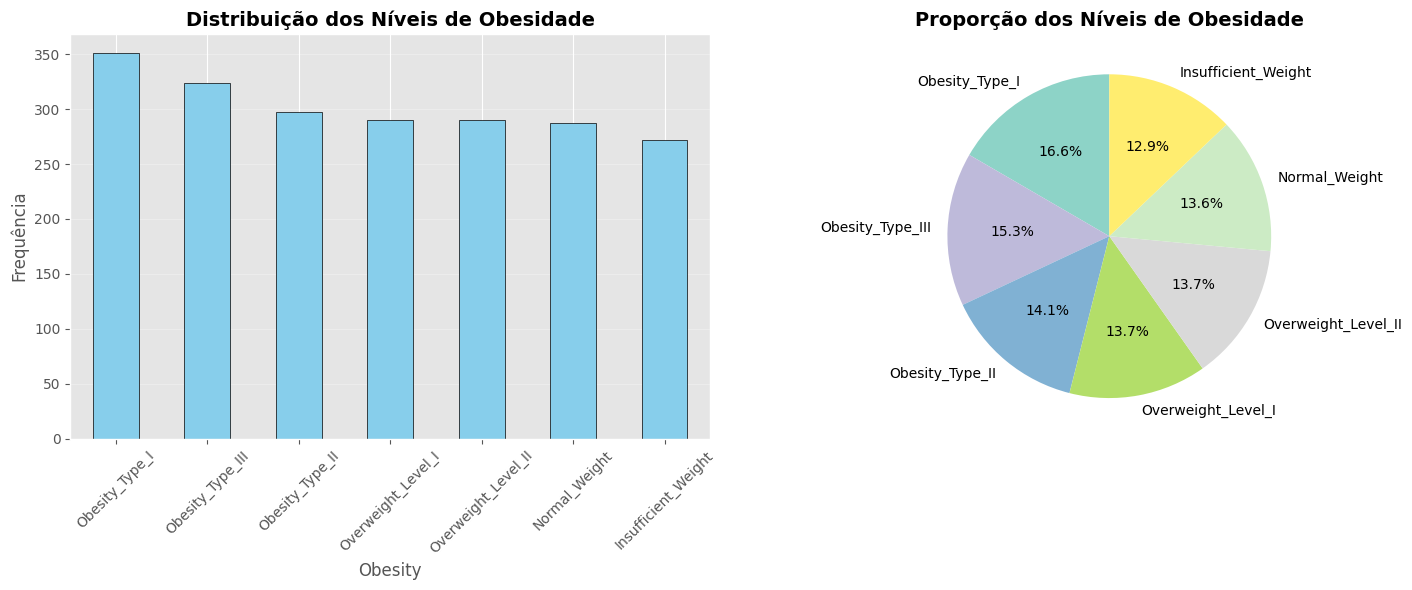


📊 ANÁLISE DOS GRÁFICOS DE DISTRIBUIÇÃO DA VARIÁVEL TARGET:
• Os gráficos mostram como as pessoas se distribuem entre os diferentes níveis de obesidade
• O gráfico de barras facilita a comparação das quantidades absolutas
• O gráfico de pizza mostra as proporções relativas de cada categoria
• É importante ter dados balanceados - se uma categoria tem muito mais exemplos,
  o modelo pode ficar 'viciado' e sempre prever essa categoria
• Se houver desequilíbrio muito grande, precisaremos de técnicas especiais de balanceamento


In [ ]:
# Análise da variável target
# Esta é a variável que queremos prever - os diferentes tipos de obesidade
print("=== DISTRIBUIÇÃO DA VARIÁVEL TARGET ===")
target_distribution = df['Obesity'].value_counts() #conta quantas pessoas há em cada categoria
print(target_distribution)
print(f"\nProporções:")
print(target_distribution / len(df) * 100) #em porcentagem

# Visualização da distribuição da variável target
plt.figure(figsize=(15, 6))

# GRÁFICO 1: GRÁFICO DE BARRAS
plt.subplot(1, 2, 1)
df['Obesity'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição dos Níveis de Obesidade', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.3)

# GRÁFICO 2: GRÁFICO DE PIZZA
plt.subplot(1, 2, 2)
colors = plt.cm.Set3(np.linspace(0, 1, len(df['Obesity'].value_counts())))
plt.pie(df['Obesity'].value_counts().values,
        labels=df['Obesity'].value_counts().index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)
plt.title('Proporção dos Níveis de Obesidade', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 ANÁLISE DOS GRÁFICOS DE DISTRIBUIÇÃO DA VARIÁVEL TARGET:")
print("• Os gráficos mostram como as pessoas se distribuem entre os diferentes níveis de obesidade")
print("• O gráfico de barras facilita a comparação das quantidades absolutas")
print("• O gráfico de pizza mostra as proporções relativas de cada categoria")
print("• É importante ter dados balanceados - se uma categoria tem muito mais exemplos,")
print("  o modelo pode ficar 'viciado' e sempre prever essa categoria")
print("• Se houver desequilíbrio muito grande, precisaremos de técnicas especiais de balanceamento")


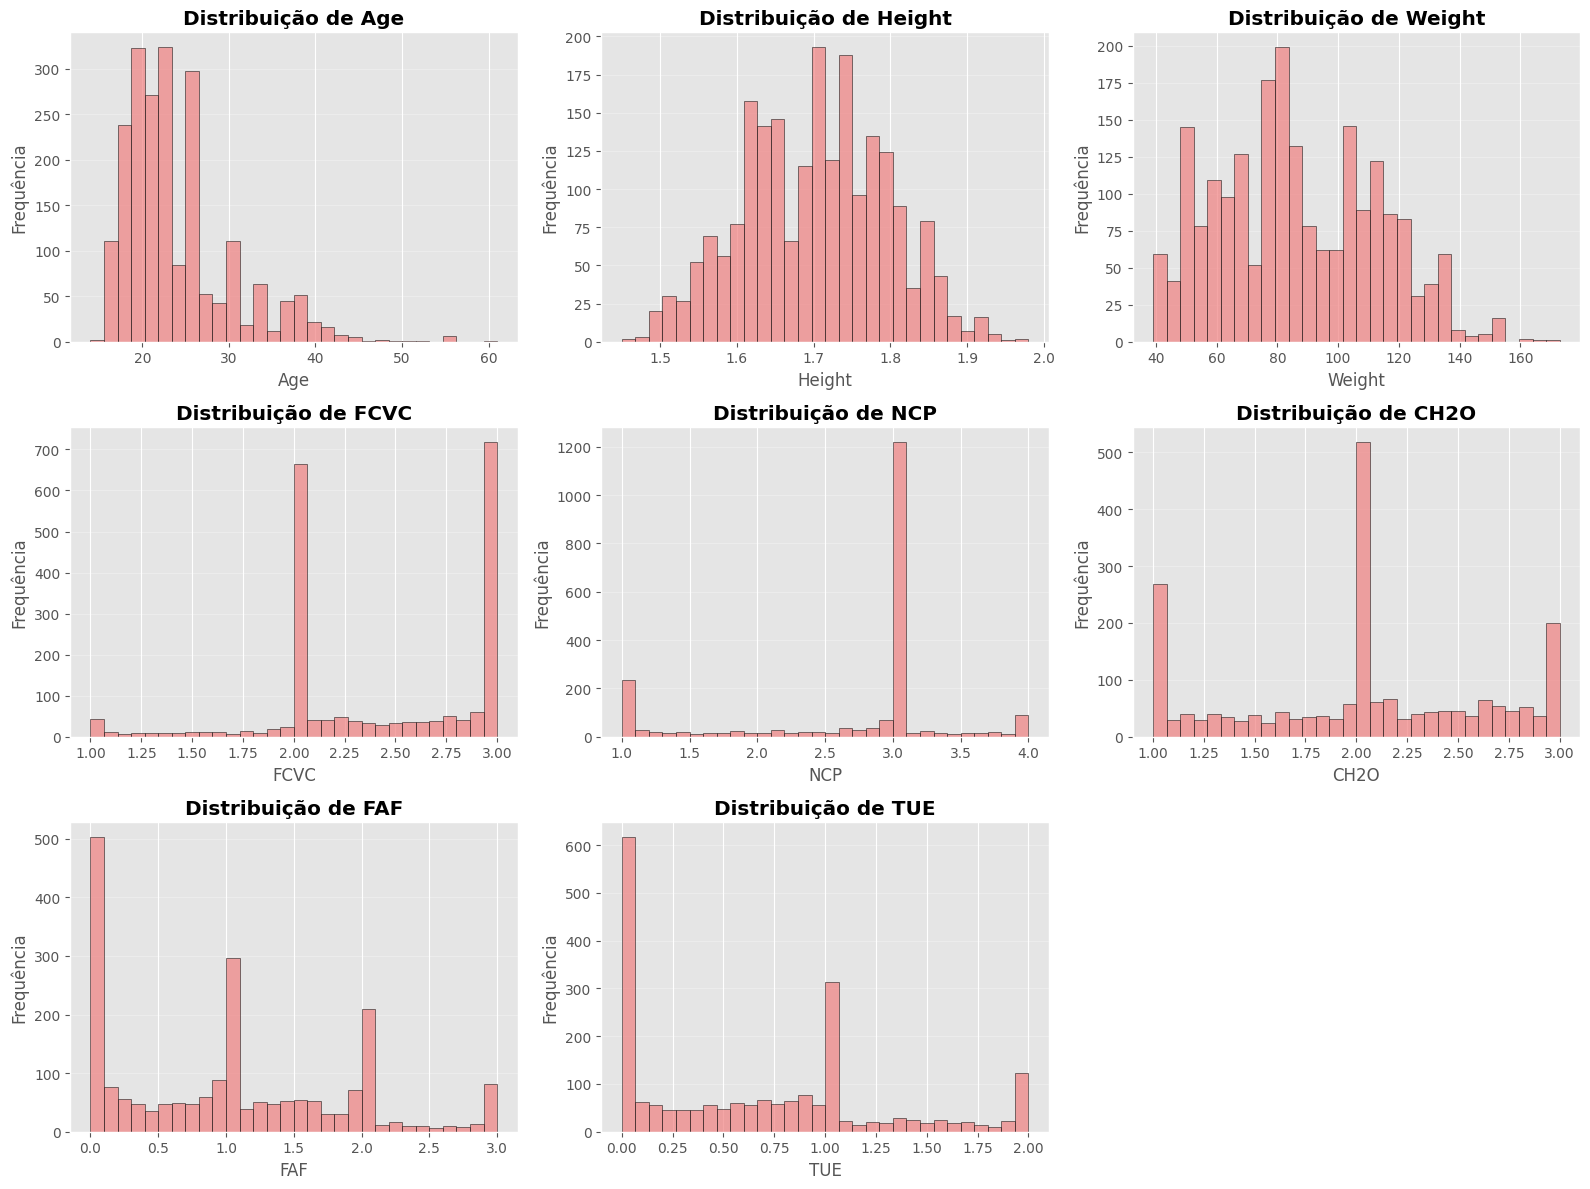

In [ ]:
# Análise de variáveis numéricas
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# CRIAÇÃO DOS HISTOGRAMAS PARA CADA VARIÁVEL NUMÉRICA
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
    plt.title(f'Distribuição de {col}', fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



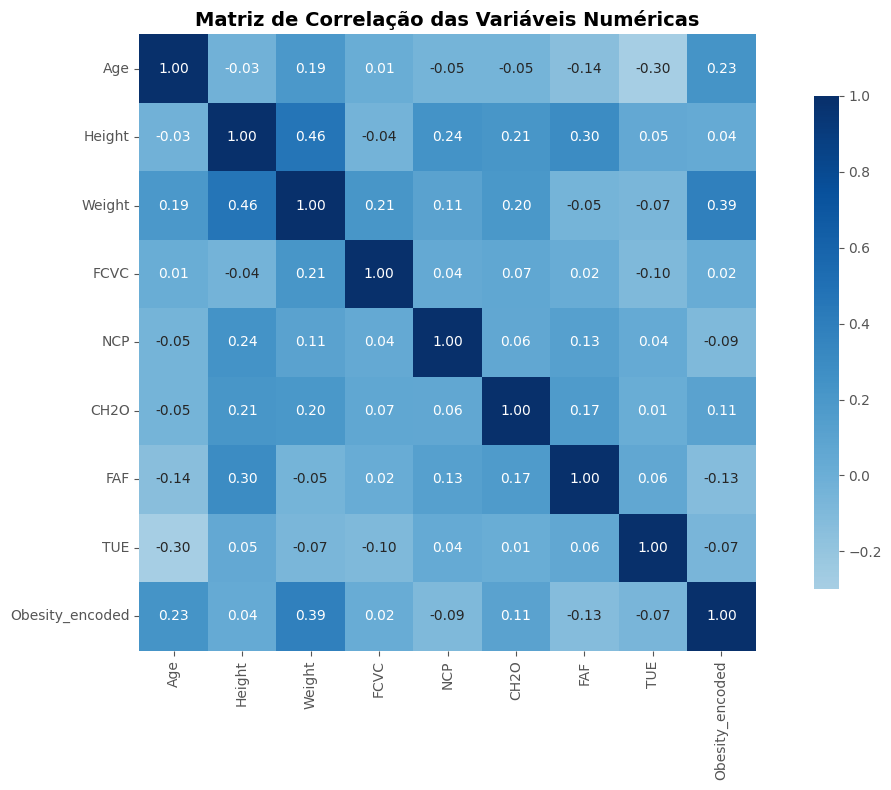

In [ ]:
# Análise de correlação
# Correlação mede o quanto duas variáveis se relacionam
# Valores entre -1 e 1: próximo de 1 = relação forte positiva, próximo de -1 = relação forte negativa
numerical_df = df[numerical_columns + ['Obesity']].copy()
# Convertendo a variável target para numérica temporariamente para correlação
le_temp = LabelEncoder()
numerical_df['Obesity_encoded'] = le_temp.fit_transform(df['Obesity'])

plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.drop('Obesity', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


#analise

**Correlações Positivas Significativas**
Height vs Weight (0.46): A correlação mais forte do conjunto, indicando que pessoas mais altas tendem a pesar mais, o que é biologicamente esperado

Weight vs Obesity_encoded (0.39): Relação moderada entre peso e classificação de obesidade

**Correlações Negativas Notáveis**
Age vs TUE (-0.30): Conforme a idade aumenta, o tempo de uso de tecnologia diminui
Weight vs TUE (-0.07): Relação fraca negativa entre peso e tempo de uso de tecnologia


**4. Pré-processamento dos Dados**

In [ ]:
# Identificação das variáveis categóricas e numéricas
categorical_columns = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print(f"Variáveis categóricas: {categorical_columns}")
print(f"Variáveis numéricas: {numerical_columns}")

# Verificando valores únicos nas variáveis categóricas
print("\n=== VALORES ÚNICOS NAS VARIÁVEIS CATEGÓRICAS ===")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Variáveis categóricas: ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Variáveis numéricas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

=== VALORES ÚNICOS NAS VARIÁVEIS CATEGÓRICAS ===
Gender: ['Female' 'Male']
family_history: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [ ]:
# Preparação dos dados para modelagem
# Aqui separamos os dados em duas partes:
# X: VARIÁVEIS INDEPENDENTES (características que usaremos para fazer a previsão)
# Removemos a coluna 'Obesity' porque ela é o que queremos prever
X = df.drop('Obesity', axis=1)
# y: VARIÁVEL DEPENDENTE (o que queremos prever)
# Esta é a resposta que queremos que o modelo aprenda a dar
y = df['Obesity']

print("Por que fazemos essa separação?")
print("• X contém as informações que o modelo usará para fazer previsões")
print("• y contém as respostas corretas que o modelo deve aprender")
print("• Durante o treino, mostramos ambos para o modelo aprender")
print("• Durante a previsão, damos só X e pedimos para ele adivinhar y")

# Encoding da variável target
# Algoritmos de ML trabalham com números, então convertemos textos em números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Classes originais: {label_encoder.classes_}")
print(f"Mapeamento: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

print("• Cada categoria de obesidade recebe um número único")
print("• O LabelEncoder guarda essa conversão para usarmos depois")


Por que fazemos essa separação?
• X contém as informações que o modelo usará para fazer previsões
• y contém as respostas corretas que o modelo deve aprender
• Durante o treino, mostramos ambos para o modelo aprender
• Durante a previsão, damos só X e pedimos para ele adivinhar y
Classes originais: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']
Mapeamento: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
• Cada categoria de obesidade recebe um número único
• O LabelEncoder guarda essa conversão para usarmos depois


In [ ]:
# Criação do pipeline de pré-processamento

print("=== CONFIGURAÇÃO DO PRÉ-PROCESSAMENTO ===")
print("Por que precisamos pré-processar os dados?")
print("• Variáveis numéricas têm escalas diferentes (ex: idade 0-100, peso 40-200)")
print("• Isso confunde o algoritmo, que pode dar mais importância para números maiores")
print("• Variáveis categóricas (textos) precisam ser convertidas em números")
print("• O StandardScaler padroniza números (média=0, desvio=1)")
print("• O OneHotEncoder transforma cada categoria em uma coluna separada")


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'
)

# DIVISÃO DOS DADOS EM TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


=== CONFIGURAÇÃO DO PRÉ-PROCESSAMENTO ===
Por que precisamos pré-processar os dados?
• Variáveis numéricas têm escalas diferentes (ex: idade 0-100, peso 40-200)
• Isso confunde o algoritmo, que pode dar mais importância para números maiores
• Variáveis categóricas (textos) precisam ser convertidas em números
• O StandardScaler padroniza números (média=0, desvio=1)
• O OneHotEncoder transforma cada categoria em uma coluna separada
Tamanho do conjunto de treino: (1688, 16)
Tamanho do conjunto de teste: (423, 16)


**5. Treinamento do Modelo GradientBoostingClassifier**

In [ ]:
# Definição do modelo GradientBoostingClassifier
gb_model = GradientBoostingClassifier()


# Criação do pipeline completo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gb_model)
])


In [ ]:
# TREINAMENTO
print("\nTreinando no conjunto completo de treino...")
pipeline.fit(X_train, y_train)

# Predições
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n=== RESULTADOS FINAIS ===")
print(f"Acurácia no conjunto de teste: {accuracy:.4f} ({accuracy*100:.2f}%)")



Treinando no conjunto completo de treino...

=== RESULTADOS FINAIS ===
Acurácia no conjunto de teste: 0.9669 (96.69%)


**6. Avaliação Detalhada do Modelo**

=== RELATÓRIO DE CLASSIFICAÇÃO ===
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.85      1.00      0.92        58
     Obesity_Type_I       0.97      0.99      0.98        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.98      0.91      0.95        58
Overweight_Level_II       1.00      0.97      0.98        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



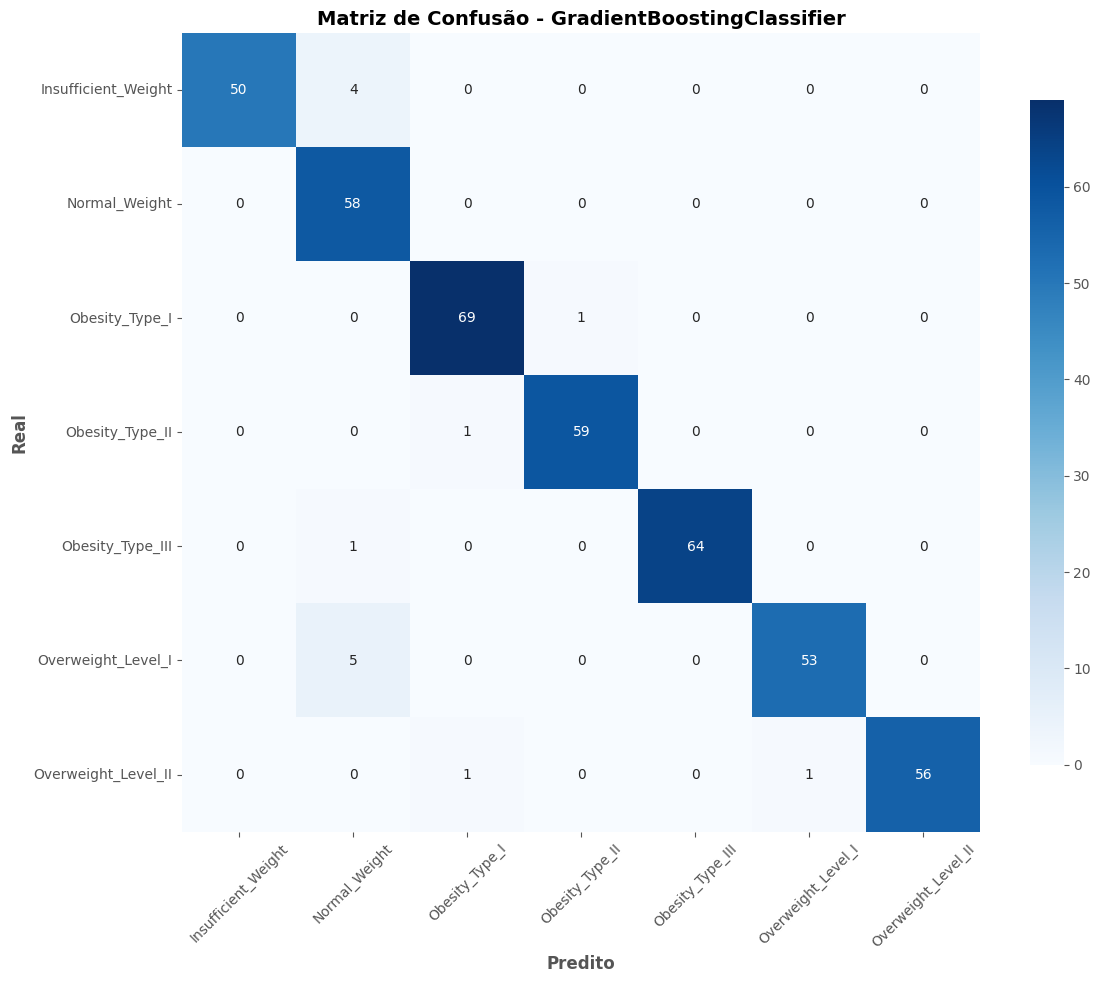


📊 ANÁLISE DA MATRIZ DE CONFUSÃO:
• Cada linha representa uma classe REAL (verdadeira)
• Cada coluna representa uma classe PREDITA (o que o modelo disse)
• Diagonal principal (diagonal de cima-esquerda para baixo-direita):
  - São os acertos! Quando real = predito
• Células fora da diagonal = erros do modelo
• Números maiores na diagonal = modelo funcionando bem
• Números altos fora da diagonal = modelo confundindo essas classes
• Use esta matriz para identificar quais classes o modelo mais confunde


In [ ]:
# Relatório de classificação
print("=== RELATÓRIO DE CLASSIFICAÇÃO ===")
target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusão
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names,
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Confusão - GradientBoostingClassifier', fontsize=14, fontweight='bold')
plt.xlabel('Predito', fontweight='bold')
plt.ylabel('Real', fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n📊 ANÁLISE DA MATRIZ DE CONFUSÃO:")
print("• Cada linha representa uma classe REAL (verdadeira)")
print("• Cada coluna representa uma classe PREDITA (o que o modelo disse)")
print("• Diagonal principal (diagonal de cima-esquerda para baixo-direita):")
print("  - São os acertos! Quando real = predito")
print("• Células fora da diagonal = erros do modelo")
print("• Números maiores na diagonal = modelo funcionando bem")
print("• Números altos fora da diagonal = modelo confundindo essas classes")
print("• Use esta matriz para identificar quais classes o modelo mais confunde")

# Interpretação da matriz de confusão

### **Classificações Perfeitas**

**Insufficient_Weight:** 50 de 54 casos corretos (93% de recall)

**Normal_Weight:** 58 de 58 casos corretos (100% de recall)

**Obesity_Type_II:** 59 de 60 casos corretos (98% de recall)

### **Principais Confusões do Modelo**
4 casos de "Insufficient_Weight" foram classificados como "Normal_Weight"

6 casos de "Overweight_Level_I" foram classificados como "Normal_Weight"

1 caso de "Obesity_Type_I" foi classificado como "Obesity_Type_II"

## **Performance Geral do Modelo**

### **Métricas Consolidadas**
**Accuracy (Acurácia):** 96% - O modelo acerta 96% de todas as predições

**Macro Average:** 0.97 (F1-score) - Performance média entre todas as classes

**Weighted Average:** 0.97 (F1-score) - Performance ponderada pelo número de amostras

**8. Validação Final e Salvamento**

In [ ]:
# Validação final - verificando se atende ao requisito de 75% de acurácia
print("=== VALIDAÇÃO FINAL ===")
print(f"Acurácia final: {accuracy:.4f} ({accuracy*100:.2f}%)")

if accuracy >= 0.75:
    print("✅ SUCESSO! O modelo atende ao requisito de acurácia > 75%")
    status = "APROVADO"
else:
    print("❌ ATENÇÃO! O modelo não atende ao requisito de acurácia > 75%")
    print("Considere ajustar hiperparâmetros ou coletar mais dados.")
    status = "REQUER AJUSTES"


=== VALIDAÇÃO FINAL ===
Acurácia final: 0.9669 (96.69%)
✅ SUCESSO! O modelo atende ao requisito de acurácia > 75%


In [ ]:
import joblib

In [ ]:
joblib.dump(gb_model, 'gb_model.joblib')

['gb_model.joblib']

In [ ]:
# testando git

textando git hb